<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据类型" data-toc-modified-id="数据类型-1">数据类型</a></span><ul class="toc-item"><li><span><a href="#Series" data-toc-modified-id="Series-1.1">Series</a></span></li><li><span><a href="#DataFrame" data-toc-modified-id="DataFrame-1.2">DataFrame</a></span></li></ul></li><li><span><a href="#数据读取" data-toc-modified-id="数据读取-2">数据读取</a></span></li><li><span><a href="#基本操作" data-toc-modified-id="基本操作-3">基本操作</a></span></li><li><span><a href="#数据选择" data-toc-modified-id="数据选择-4">数据选择</a></span><ul class="toc-item"><li><span><a href="#基于数字索引" data-toc-modified-id="基于数字索引-4.1">基于数字索引</a></span></li><li><span><a href="#基于标签名称选择" data-toc-modified-id="基于标签名称选择-4.2">基于标签名称选择</a></span></li></ul></li><li><span><a href="#数据删减" data-toc-modified-id="数据删减-5">数据删减</a></span></li><li><span><a href="#数据填充" data-toc-modified-id="数据填充-6">数据填充</a></span><ul class="toc-item"><li><span><a href="#检测缺失值" data-toc-modified-id="检测缺失值-6.1">检测缺失值</a></span></li><li><span><a href="#插值填充" data-toc-modified-id="插值填充-6.2">插值填充</a></span></li></ul></li><li><span><a href="#数据可视化" data-toc-modified-id="数据可视化-7">数据可视化</a></span></li><li><span><a href="#其他用法" data-toc-modified-id="其他用法-8">其他用法</a></span></li></ul></div>

*****

Pandas 是非常著名的开源数据处理库，其基于 NumPy 开发，该工具是 Scipy 生态中为了解决数据分析任务而设计。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的函数和方法。

特有的数据结构是 Pandas 的优势和核心。简单来讲，我们可以将任意格式的数据转换为 Pandas 的数据类型，并使用 Pandas 提供的一系列方法进行转换、操作，最终得到我们期望的结果。

所以，我们首先需要了解并熟悉 Pandas 支持的数据类型。

## 数据类型

### Series

In [1]:
%matplotlib inline
import pandas as pd

s = pd.Series({'a': 10, 'b': 20, 'c': 30})
s

a    10
b    20
c    30
dtype: int64

In [2]:
type(s)

pandas.core.series.Series

In [3]:
import numpy as np

s = pd.Series(np.random.randn(5))
s

0    0.322943
1   -1.137817
2   -0.422670
3   -0.044905
4    0.311008
dtype: float64

### DataFrame

In [4]:
df = pd.DataFrame({'one': pd.Series([1, 2, 3]), 'two': pd.Series([4, 5, 6])})
df

,one,two
0,1,4
1,2,5
2,3,6


In [5]:
df = pd.DataFrame({'one': [1, 2, 3], 'two': [4, 5, 6]})
df

,one,two
0,1,4
1,2,5
2,3,6


In [6]:
df = pd.DataFrame([{
    'one': 1,
    'two': 4
}, {
    'one': 2,
    'two': 5
}, {
    'one': 3,
    'two': 6
}])
df

,one,two
0,1,4
1,2,5
2,3,6


In [7]:
pd.DataFrame(np.random.randint(5, size=(2, 4)))

,0,1,2,3
0,4,0,0,1
1,1,1,3,3


Series 实际上可以被初略看出是只有 1 列数据的 DataFrame。当然，这个说法不严谨，二者的核心区别仍然是 Series 没有列索引。你可以观察如下所示由 NumPy 一维随机数组生成的 Series 和 DataFrame。

In [8]:
pd.Series(np.random.randint(5, size=(5, )))

0    2
1    3
2    1
3    1
4    4
dtype: int32

In [9]:
pd.DataFrame(np.random.randint(5, size=(5, )))

,0
0,1
1,1
2,0
3,2
4,1


Pandas 还支持三维 `Panel` 、四维 `Panel4D` 甚至高维 `PanelND` ，它们使用频率极低，工作中非常罕见。

## 数据读取

In [10]:
# 这是蓝桥云课教程提供的数据集文件
# Pandas内置远程文件加载
df = pd.read_csv('https://labfile.oss.aliyuncs.com/courses/906/los_census.csv')
df

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


DataFrame 是 Pandas 构成的核心。一切的数据，无论是外部读取还是自行生成，我们都需要先将其转换为 Pandas 的 `DataFrame` 或者 `Series` 数据类型。

`pd.read_` 前缀开始的方法还可以读取各式各样的数据文件，且支持连接数据库。这里，我们不再依次赘述，你可以阅读 [<span class="fa fa-external-link-square" aria-hidden="true"> 官方文档相应章节</span>](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) 熟悉这些方法以及搞清楚这些方法包含的参数。

Pandas 针对数据操作的全部方法都是基于 Pandas 支持的数据结构设计的。也就是说，只有 Series 或者 DataFrame 才能使用 Pandas 提供的方法和函数进行处理。

## 基本操作

In [11]:
df.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73


In [12]:
df.tail(7)

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
312,93550,74929,27.5,36414,38515,20864,3.58
313,93551,50798,37.0,25056,25742,15963,3.18
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53
318,93591,7285,30.9,3653,3632,1982,3.67


In [13]:
df.describe()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,91000.673981,33241.341693,36.527586,16391.564263,16849.777429,10964.570533,2.828119
std,908.360203,21644.417455,8.692999,10747.495566,10934.986468,6270.646400,0.835658
min,90001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90243.500000,19318.500000,32.400000,9763.500000,9633.500000,6765.500000,2.435000
50%,90807.000000,31481.000000,37.100000,15283.000000,16202.000000,10968.000000,2.830000
75%,91417.000000,44978.000000,41.000000,22219.500000,22690.500000,14889.500000,3.320000
max,93591.000000,105549.000000,74.000000,52794.000000,53185.000000,31087.000000,4.670000


In [14]:
df.values

array([[9.1371e+04, 1.0000e+00, 7.3500e+01, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [9.0001e+04, 5.7110e+04, 2.6600e+01, ..., 2.8642e+04, 1.2971e+04,
        4.4000e+00],
       [9.0002e+04, 5.1223e+04, 2.5500e+01, ..., 2.6347e+04, 1.1731e+04,
        4.3600e+00],
       ...,
       [9.3560e+04, 1.8910e+04, 3.2400e+01, ..., 9.4190e+03, 6.4690e+03,
        2.9200e+00],
       [9.3563e+04, 3.8800e+02, 4.4500e+01, ..., 1.2500e+02, 1.0300e+02,
        2.5300e+00],
       [9.3591e+04, 7.2850e+03, 3.0900e+01, ..., 3.6320e+03, 1.9820e+03,
        3.6700e+00]])

可以同时使用 Pandas 和 NumPy 提供的 API 对同一数据进行操作，并在二者之间进行随意转换。

除了 `.values`，DataFrame 支持的常见属性可以通过 [<span class="fa fa-external-link-square" aria-hidden="true"> 官方文档相应章节</span>](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#attributes-and-underlying-data) 查看。其中常用的有：

In [15]:
df.index

RangeIndex(start=0, stop=319, step=1)

In [16]:
df.columns

Index(['Zip Code', 'Total Population', 'Median Age', 'Total Males',
       'Total Females', 'Total Households', 'Average Household Size'],
      dtype='object')

In [17]:
df.shape

(319, 7)

## 数据选择

### 基于数字索引

In [18]:
df.iloc[:3]  # DataFrame 索引优先针对行

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36


In [19]:
df.iloc[5]

Zip Code                  90005.0
Total Population          37681.0
Median Age                   33.9
Total Males               19299.0
Total Females             18382.0
Total Households          15044.0
Average Household Size        2.5
Name: 5, dtype: float64

In [20]:
df.iloc[[1, 3, 5]]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
1,90001,57110,26.6,28468,28642,12971,4.40
3,90003,66266,26.3,32631,33635,15642,4.22
5,90005,37681,33.9,19299,18382,15044,2.50


In [21]:
# DataFrame 索引从0开始，前闭后开
df.iloc[:, 1:4]

,Total Population,Median Age,Total Males
0,1,73.5,0
1,57110,26.6,28468
2,51223,25.5,24876
3,66266,26.3,32631
4,62180,34.8,31302
...,...,...,...
314,38158,28.4,18711
315,2138,43.3,1121
316,18910,32.4,9491
317,388,44.5,263


### 基于标签名称选择

In [22]:
df.loc[0:2]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36


In [23]:
df.loc[[0, 2, 4]]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
2,90002,51223,25.5,24876,26347,11731,4.36
4,90004,62180,34.8,31302,30878,22547,2.73


In [24]:
# 此处是闭区间
df.loc[:, 'Total Population':'Total Males']

,Total Population,Median Age,Total Males
0,1,73.5,0
1,57110,26.6,28468
2,51223,25.5,24876
3,66266,26.3,32631
4,62180,34.8,31302
...,...,...,...
314,38158,28.4,18711
315,2138,43.3,1121
316,18910,32.4,9491
317,388,44.5,263


In [25]:
df.loc[[0, 2], 'Median Age':]

,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,73.5,0,1,1,1.00
2,25.5,24876,26347,11731,4.36


## 数据删减

Pandas 中，以 `.drop` 开头的方法都与数据删减有关。

In [26]:
df.drop(labels=['Median Age', 'Total Males'], axis=1)

,Zip Code,Total Population,Total Females,Total Households,Average Household Size
0,91371,1,1,1,1.00
1,90001,57110,28642,12971,4.40
2,90002,51223,26347,11731,4.36
3,90003,66266,33635,15642,4.22
4,90004,62180,30878,22547,2.73
...,...,...,...,...,...
314,93552,38158,19447,9690,3.93
315,93553,2138,1017,816,2.62
316,93560,18910,9419,6469,2.92
317,93563,388,125,103,2.53


In [27]:
df.drop_duplicates()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


In [28]:
df.dropna()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


## 数据填充

### 检测缺失值

Pandas 为了更方便地检测缺失值，将不同类型数据的缺失均采用 `NaN` 标记。这里的 `NaN` 代表 Not a Number，它仅仅是作为一个标记。例外是，在时间序列里，时间戳的丢失采用 `NaT` (Not a Time) 标记。

In [29]:
df = pd.DataFrame(np.random.rand(9, 5), columns=list('ABCDE'))
df.insert(value=pd.Timestamp('2017-10-01'), loc=0, column='Time')
df.iloc[[1, 3, 5, 7], [0, 2, 4]] = np.NaN
df.iloc[[2, 4, 6, 8], [1, 3, 5]] = np.NaN
df

,Time,A,B,C,D,E
0,2017-10-01,0.569221,0.533253,0.372368,0.502719,0.863776
1,NaT,0.152885,NaN,0.358571,NaN,0.767809
2,2017-10-01,NaN,0.088783,NaN,0.872832,NaN
3,NaT,0.590006,NaN,0.762546,NaN,0.121082
4,2017-10-01,NaN,0.780465,NaN,0.003889,NaN
5,NaT,0.788121,NaN,0.897208,NaN,0.090386
6,2017-10-01,NaN,0.594561,NaN,0.855504,NaN
7,NaT,0.001040,NaN,0.121819,NaN,0.356359
8,2017-10-01,NaN,0.563603,NaN,0.846089,NaN


In [30]:
df.isna()

,Time,A,B,C,D,E
0,False,False,False,False,False,False
1,True,False,True,False,True,False
2,False,True,False,True,False,True
3,True,False,True,False,True,False
4,False,True,False,True,False,True
5,True,False,True,False,True,False
6,False,True,False,True,False,True
7,True,False,True,False,True,False
8,False,True,False,True,False,True


In [31]:
df.fillna(0)  # 数据填充是恢复数据完整性的一个极端

,Time,A,B,C,D,E
0,2017-10-01 00:00:00,0.569221,0.533253,0.372368,0.502719,0.863776
1,0,0.152885,0.000000,0.358571,0.000000,0.767809
2,2017-10-01 00:00:00,0.000000,0.088783,0.000000,0.872832,0.000000
3,0,0.590006,0.000000,0.762546,0.000000,0.121082
4,2017-10-01 00:00:00,0.000000,0.780465,0.000000,0.003889,0.000000
5,0,0.788121,0.000000,0.897208,0.000000,0.090386
6,2017-10-01 00:00:00,0.000000,0.594561,0.000000,0.855504,0.000000
7,0,0.001040,0.000000,0.121819,0.000000,0.356359
8,2017-10-01 00:00:00,0.000000,0.563603,0.000000,0.846089,0.000000


In [32]:
df.fillna(method='pad')

,Time,A,B,C,D,E
0,2017-10-01,0.569221,0.533253,0.372368,0.502719,0.863776
1,2017-10-01,0.152885,0.533253,0.358571,0.502719,0.767809
2,2017-10-01,0.152885,0.088783,0.358571,0.872832,0.767809
3,2017-10-01,0.590006,0.088783,0.762546,0.872832,0.121082
4,2017-10-01,0.590006,0.780465,0.762546,0.003889,0.121082
5,2017-10-01,0.788121,0.780465,0.897208,0.003889,0.090386
6,2017-10-01,0.788121,0.594561,0.897208,0.855504,0.090386
7,2017-10-01,0.001040,0.594561,0.121819,0.855504,0.356359
8,2017-10-01,0.001040,0.563603,0.121819,0.846089,0.356359


In [33]:
df.fillna(method='bfill')  # 最后一行有缺失，因此填充后依旧存在

,Time,A,B,C,D,E
0,2017-10-01,0.569221,0.533253,0.372368,0.502719,0.863776
1,2017-10-01,0.152885,0.088783,0.358571,0.872832,0.767809
2,2017-10-01,0.590006,0.088783,0.762546,0.872832,0.121082
3,2017-10-01,0.590006,0.780465,0.762546,0.003889,0.121082
4,2017-10-01,0.788121,0.780465,0.897208,0.003889,0.090386
5,2017-10-01,0.788121,0.594561,0.897208,0.855504,0.090386
6,2017-10-01,0.001040,0.594561,0.121819,0.855504,0.356359
7,2017-10-01,0.001040,0.563603,0.121819,0.846089,0.356359
8,2017-10-01,NaN,0.563603,NaN,0.846089,NaN


In [34]:
df.iloc[[3, 5], [1, 3, 5]] = np.NaN

In [35]:
df.fillna(method='pad')

,Time,A,B,C,D,E
0,2017-10-01,0.569221,0.533253,0.372368,0.502719,0.863776
1,2017-10-01,0.152885,0.533253,0.358571,0.502719,0.767809
2,2017-10-01,0.152885,0.088783,0.358571,0.872832,0.767809
3,2017-10-01,0.152885,0.088783,0.358571,0.872832,0.767809
4,2017-10-01,0.152885,0.780465,0.358571,0.003889,0.767809
5,2017-10-01,0.152885,0.780465,0.358571,0.003889,0.767809
6,2017-10-01,0.152885,0.594561,0.358571,0.855504,0.767809
7,2017-10-01,0.001040,0.594561,0.121819,0.855504,0.356359
8,2017-10-01,0.001040,0.563603,0.121819,0.846089,0.356359


In [36]:
df.fillna(method='pad', limit=1)

,Time,A,B,C,D,E
0,2017-10-01,0.569221,0.533253,0.372368,0.502719,0.863776
1,2017-10-01,0.152885,0.533253,0.358571,0.502719,0.767809
2,2017-10-01,0.152885,0.088783,0.358571,0.872832,0.767809
3,2017-10-01,NaN,0.088783,NaN,0.872832,NaN
4,2017-10-01,NaN,0.780465,NaN,0.003889,NaN
5,2017-10-01,NaN,0.780465,NaN,0.003889,NaN
6,2017-10-01,NaN,0.594561,NaN,0.855504,NaN
7,2017-10-01,0.001040,0.594561,0.121819,0.855504,0.356359
8,2017-10-01,0.001040,0.563603,0.121819,0.846089,0.356359


In [37]:
df.fillna(df.mean()['C':'E'])
# 后续版本，平均值和中位数在不限定仅计算数值数据时，还会把时间戳列加入计算

C:\Users\DRAGON~1\AppData\Local\Temp/ipykernel_7988/3952353766.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean()['C':'E'])


,Time,A,B,C,D,E
0,2017-10-01,0.569221,0.533253,0.372368,0.502719,0.863776
1,NaT,0.152885,NaN,0.358571,0.616207,0.767809
2,2017-10-01,NaN,0.088783,0.284253,0.872832,0.662648
3,NaT,NaN,NaN,0.284253,0.616207,0.662648
4,2017-10-01,NaN,0.780465,0.284253,0.003889,0.662648
5,NaT,NaN,NaN,0.284253,0.616207,0.662648
6,2017-10-01,NaN,0.594561,0.284253,0.855504,0.662648
7,NaT,0.001040,NaN,0.121819,0.616207,0.356359
8,2017-10-01,NaN,0.563603,0.284253,0.846089,0.662648


### 插值填充

插值是数值分析中一种方法。简而言之，就是借助于一个函数（线性或非线性），再根据已知数据去求解未知数据的值。插值在数据领域非常常见，它的好处在于，可以尽量去还原数据本身的样子。

我们可以通过 `interpolate()` 方法完成线性插值。当然，其他一些插值算法可以阅读官方文档了解。

In [38]:
df = pd.DataFrame({
    'A': [1.1, 2.2, np.NaN, 4.5, 5.7, 6.9],
    'B': [0.21, np.NaN, np.NaN, 3.1, 11.7, 13.2]
})
df

,A,B
0,1.1,0.21
1,2.2,NaN
2,NaN,NaN
3,4.5,3.10
4,5.7,11.70
5,6.9,13.20


In [39]:
df_interpolate = df.interpolate()
df_interpolate

,A,B
0,1.10,0.210000
1,2.20,1.173333
2,3.35,2.136667
3,4.50,3.100000
4,5.70,11.700000
5,6.90,13.200000


`interpolate()` 支持多种插值算法，使用 `method=` 参数指定。

1. 如果你的数据增长速率越来越快，可以选择 `method='quadratic'` 二次插值。
2. 如果数据集呈现出累计分布的样子，推荐选择 `method='pchip'` 。
3. 如果需要填补缺省值，以平滑绘图为目标，推荐选择 `method='akima'` 。

当然，最后提到的 `method='akima'` ，需要你的环境中安装了 Scipy 库。除此之外，`method='barycentric'` 和 `method='pchip'` 同样也需要 Scipy 才能使用。

## 数据可视化

NumPy，Pandas，Matplotlib 构成了一个完善的数据分析生态圈，所以 3 个工具的兼容性也非常好，甚至共享了大量的接口。当我们的数据是以 DataFrame 格式呈现时，可以直接使用 Pandas 提供的 ·DataFrame.plot· 方法调用 Matplotlib 接口绘制常见的图形。

<AxesSubplot:>

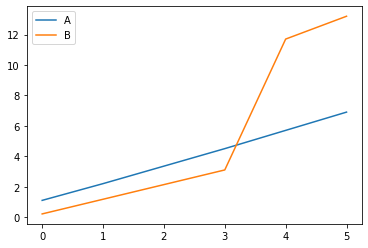

In [40]:
df_interpolate.plot()

<AxesSubplot:>

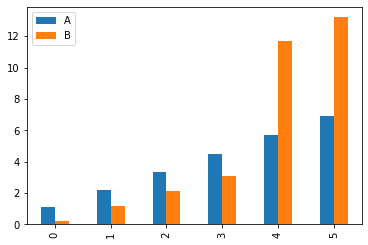

In [41]:
df_interpolate.plot(kind='bar')

## 其他用法

由于 Pandas 包含的内容实在太多，除了阅读完整的官方文档，很难做到通过一个实验或者一个课程进行全面了解。当然，本课程的目的是带大家熟悉 Pandas 的常用基础方法，至少你大致清楚了 Pandas 是什么，能干什么。

除了上面提到的一些方法和技巧，实际上 Pandas 常用的还有：

- [<i class="fa fa-external-link-square" aria-hidden="true"> 数据计算</i>](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#binary-operator-functions)，例如：`DataFrame.add` 等。
- [<i class="fa fa-external-link-square" aria-hidden="true"> 数据聚合</i>](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#function-application-groupby-window)，例如：`DataFrame.groupby` 等。
- [<i class="fa fa-external-link-square" aria-hidden="true"> 统计分析</i>](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats)，例如：`DataFrame.abs` 等。
- [<i class="fa fa-external-link-square" aria-hidden="true"> 时间序列</i>](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#time-series-related)，例如：`DataFrame.shift` 等。